In [1]:
!pip install nltk
!pip install textblob

In [4]:
#Import Libraries for sentiment analysis, tokenizing data
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
import pandas
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Load reviews from csv file

#reviews=pd.read_csv()


g


In [5]:
example_reviews= ["Hello, this is an exajmple reoview, i wanted to say that this app is very bad and it broke down after i tried to login so it is horrible",
                 "This app is horrible and i dont want it, i hate it because it is too slow",
                  "I like this app, it is incredible and awesome"
                 ]

In [6]:
#Do the analysis
#Do the analysis on one review->Write function to automate the process for every review

#example review



#correct spelling
def analyze_reviews(reviews):
    keyword_list={}
    for review in reviews:
        review = str(TextBlob(review).correct())
        #tokenize review
        tokens = nltk.word_tokenize(review)
        #ignore stop_words
        stop_words = set(nltk.corpus.stopwords.words('english'))
        tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
        #get the sentiment of the review
        sentiment = TextBlob(review).sentiment.polarity
        print("Keywords: ", tokens)
        print("Sentiment polarity: ", sentiment)
        sentiment_in_words="neutral"
        if (sentiment<0):
            sentiment_in_words="negative"
        elif(sentiment>=0):
            sentiment_in_words="positive"
        print(sentiment_in_words)
        #for every keyword, count how many times they appear in a negative respectively positive review
        for token in tokens:
            if token in keyword_list:
                if sentiment<0:
                    keyword_list[token][0]+=1
                elif sentiment>=0:
                    keyword_list[token][1]+=1
            else:
                if sentiment<0:
                    keyword_list[token]=[1,0]
                elif sentiment>=0:
                    keyword_list[token]=[0,1]
        
    return keyword_list







In [120]:
time_frame=4
time_start="01/20/2020"
time_end="01/23/2020"
keyword="reviews"

In [82]:
reviews=[["Bad reviews", "Good review"],["Bad review review is horrible", "good review, review is best"],["example review, review good", "not good review"],[]]
a_reviews=[[]] * time_frame   
for i in range(time_frame):
    print(i)
    if(len(reviews[i])!=0):
        a_reviews[i] = analyze_reviews(reviews[i])
    else:
        a_reviews[i]=[]

0
Keywords:  ['reviews']
Sentiment polarity:  0.0
positive
Keywords:  ['good', 'review']
Sentiment polarity:  0.7
positive
1
Keywords:  ['review', 'review', 'horrible']
Sentiment polarity:  -1.0
negative
Keywords:  ['good', 'review', ',', 'review', 'best']
Sentiment polarity:  0.85
positive
2
Keywords:  ['example', 'review', ',', 'review', 'good']
Sentiment polarity:  0.7
positive
Keywords:  ['good', 'review']
Sentiment polarity:  -0.35
negative
3


In [83]:
data_keyword=[[]]* time_frame

In [84]:


for i in range(time_frame):
    if(keyword in a_reviews[i]):
        data_keyword[i]=a_reviews[i][keyword]
    else: data_keyword[i] = [0,0]
        

In [138]:
#look per date
import pandas



def make_graph(keyword, data_negative,data_positive,time_frame,time_start,time_end):
    
    x=[i for i in range(time_frame)]
    plt.title("Positive and Negative reviews with the keyword {}".format(keyword))
    plt.plot(x,data_negative, label="negative review", color="red")
    plt.plot(x,data_positive,label="positive review",color="blue")
    xi=pandas.date_range(time_start,time_end,freq='d')
    plt.xticks(x,xi.strftime('%m/%d/%Y, 'r''))
    plt.legend()
    plt.show()

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23'], dtype='datetime64[ns]', freq='D')


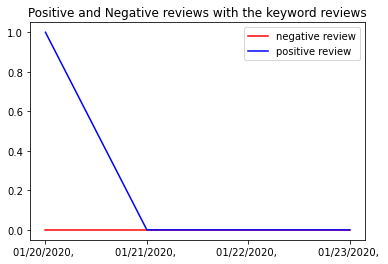

In [139]:
data_negative=[i[0] for i in data_keyword]
data_positive=[i[1] for i in data_keyword]
make_graph(keyword,[i[0] for i in data_keyword],[i[1] for i in data_keyword],time_frame,time_start,time_end)




